<a href="https://colab.research.google.com/github/njonge-nathan/Lab-Activity-for-Week-starting-17th-October/blob/main/Lab_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*094230* - Nathan Njonge


 

# 1.   Review what syntax analysis is and in a few words, describe what this phase of compiler construction entails.






Syntax Analysis is a second phase of the compiler design process in which the given input string is checked for the confirmation of rules and structure of the formal grammar. It analyses the syntactical structure and checks if the given input is in the correct syntax of the programming language or not.

Syntax Analysis in Compiler Design process comes after the Lexical analysis phase. It is also known as the Parse Tree or Syntax Tree. The Parse Tree is developed with the help of pre-defined grammar of the language. The syntax analyser also checks whether a given program fulfills the rules implied by a context-free grammar. If it satisfies, the parser then creates the parse tree of that source program. Otherwise, it will display error messages.

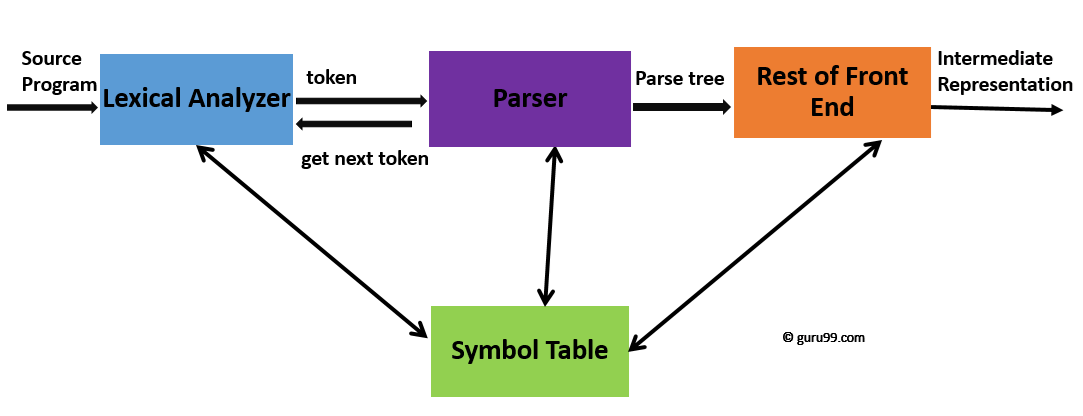

# 2. Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple syntax analyzer.

In [ ]:
/* Lexical analyzer returns a double floating point 
   number on the stack and the token NUM, or the ASCII
   character read if not a number.  Skips all blanks
   and tabs, returns 0 for EOF. */

#include <ctype.h>

yylex ()
{
  int c;

  /* skip white space  */
  while ((c = getchar ()) == ' ' || c == '\t')  
    ;
  /* process numbers   */
  if (c == '.' || isdigit (c))                
    {
      ungetc (c, stdin);
      scanf ("%lf", &yylval);
      return NUM;
    }
  /* return end-of-file  */
  if (c == EOF)                            
    return 0;
  /* return single chars */
  return c;                                
}

T

This lexical analyzer skips blanks and tabs, then reads in numbers as double and returns them as NUM tokens. Any other character that isn't part of a number is a separate token. Note that the token-code for such a single-character token is the character itself.

The return value of the lexical analyzer function is a numeric code which represents a token type. The same text used in Bison rules to stand for this token type is also a C expression for the numeric code for the type. This works in two ways. If the token type is a character literal, then its numeric code is the ASCII code for that character; you can use the same character literal in the lexical analyzer to express the number. If the token type is an identifier, that identifier is defined by Bison as a C macro whose definition is the appropriate number. In this example, therefore, NUM becomes a macro for yylex to use.

The semantic value of the token (if it has one) is stored into the global variable yylval, which is where the Bison parser will look for it. (The C data type of yylval is YYSTYPE, which was defined at the beginning of the grammar; see section Declarations for rpcalc.)

A token type code of zero is returned if the end-of-file is encountered. (Bison recognizes any nonpositive value as indicating the end of the input.)